✅ PDF Report Successfully Generated: Report.pdf


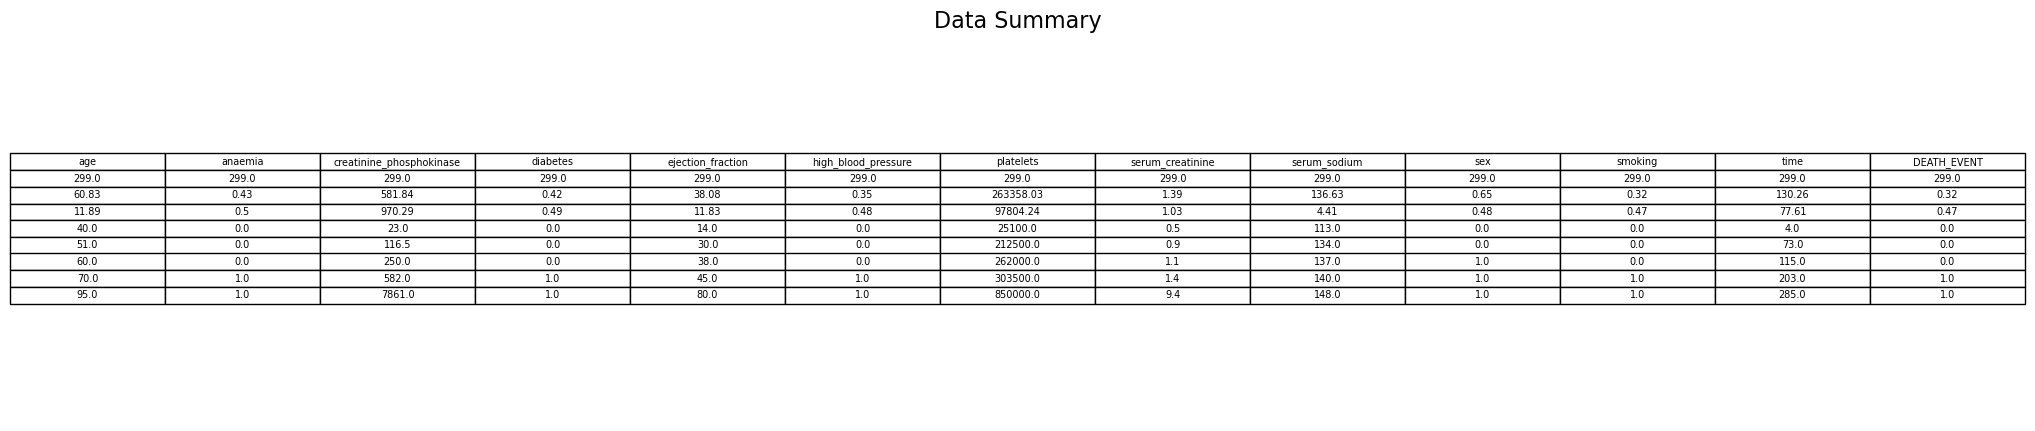

In [3]:
!pip install fpdf
import pandas as pd
import matplotlib.pyplot as plt
from fpdf import FPDF

# -------------------------
# Step 1: Read Data & Analyze
# -------------------------

# Load data from DATA.CSV (Ensure DATA.CSV exists in your working directory)
df = pd.read_csv("C:/Users/atyam/Downloads/DATA.csv")

# Perform summary analysis
summary = df.describe()

# Save summary as an image (Improved visibility)
plt.figure(figsize=(10, 5))
plt.title("Data Summary", fontsize=16)
plt.table(cellText=summary.round(2).values, 
          colLabels=summary.columns, 
          cellLoc="center", loc="center",
          colWidths=[0.2] * len(summary.columns))
plt.axis("off")
plt.savefig("summary.png", bbox_inches="tight", dpi=300)

# -------------------------
# Step 2: Generate PDF Report
# -------------------------

class PDFReport(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(200, 10, "Automated Data Report", ln=True, align="C")
        self.ln(10)

    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 10)
        self.cell(0, 10, f"Page {self.page_no()}", align="C")

# Create PDF object
pdf = PDFReport()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()

# Report Title
pdf.set_font("Arial", "B", 14)
pdf.cell(200, 10, "Summary of Data Analysis:", ln=True, align="L")
pdf.ln(10)

# **Improvement: Add summary directly to PDF**
pdf.set_font("Arial", size=10)
for col in summary.columns:
    pdf.cell(200, 10, f"{col}: {summary[col].values}", ln=True)

# **Improvement: Use a higher resolution summary image**
pdf.image("summary.png", x=10, y=50, w=190)

# Save PDF
pdf.output("Report.pdf")

print("✅ PDF Report Successfully Generated: Report.pdf")